In [ ]:
!pip install prophet

In [ ]:
!pip install yfinance

In [2]:
import yfinance as yf
import prophet as Prophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [3]:
start_date = "2020-01-02"

end_date = "2022-09-01"

train_end_date = "2022-08-14"

In [4]:
ticker_list = ["GOOG", "VTI"]

data = yf.download(ticker_list, start = start_date, end= end_date)[["Close"]]

data.head()

[*********************100%***********************]  2 of 2 completed


Close            
                 GOOG         VTI
Date                             
2020-01-02  68.368500  164.979996
2020-01-03  68.032997  163.929993
2020-01-06  69.710503  164.490005
2020-01-07  69.667000  164.100006
2020-01-08  70.216003  164.910004

In [4]:
data.shape

(672, 2)

In [5]:
len(data)

672

In [6]:
data.describe().T

count        mean        std         min         25%        50%  \
Close GOOG  672.0  105.786198  28.218500   52.831001   76.034252  111.28875   
      VTI   672.0  197.082946  30.537813  111.910004  171.127502  203.62500   

                   75%         max  
Close GOOG  132.381500  150.709000  
      VTI   222.850006  242.970001

In [7]:
data.columns = data.columns.droplevel(0)

In [8]:
data.head()

,GOOG,VTI
Date,,
2020-01-02,68.368500,164.979996
2020-01-03,68.032997,163.929993
2020-01-06,69.710503,164.490005
2020-01-07,69.667000,164.100006
2020-01-08,70.216003,164.910004


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2020-01-02 to 2022-08-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    672 non-null    float64
 1   VTI     672 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


## add more visualization on time series data


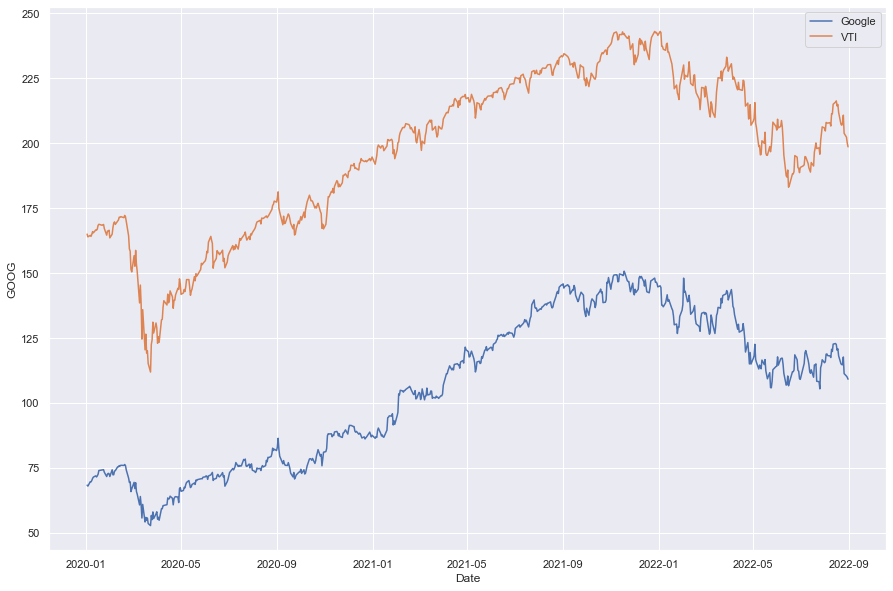

In [10]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x= data.index, y=data.GOOG)
sns.lineplot(x= data.index, y=data.VTI)
plt.legend(["Google", "VTI"])
plt.show()

In [6]:
data = data.reset_index()

In [7]:
data.columns = ["ds", "y", "VTI"]

In [8]:
data.head()

,ds,y,VTI
0,2020-01-02,68.368500,164.979996
1,2020-01-03,68.032997,163.929993
2,2020-01-06,69.710503,164.490005
3,2020-01-07,69.667000,164.100006
4,2020-01-08,70.216003,164.910004


In [14]:
data.corrwith(data["y"])

y      1.000000
VTI    0.963487
dtype: float64

In [15]:
train = data[data["ds"] <= train_end_date]
test = data[data["ds"] > train_end_date]

In [16]:
test.shape

(13, 3)

In [17]:
train.shape

(659, 3)

In [18]:
train["ds"].min()

Timestamp('2020-01-02 00:00:00')

In [19]:
train["ds"].max()

Timestamp('2022-08-12 00:00:00')

In [20]:
test["ds"].min()

Timestamp('2022-08-15 00:00:00')

In [21]:
test["ds"].max()

Timestamp('2022-08-31 00:00:00')

In [22]:
model_baseline = Prophet.Prophet()

In [23]:
model_baseline.fit(train)

23:08:51 - cmdstanpy - INFO - Chain [1] start processing
23:08:51 - cmdstanpy - INFO - Chain [1] done processing


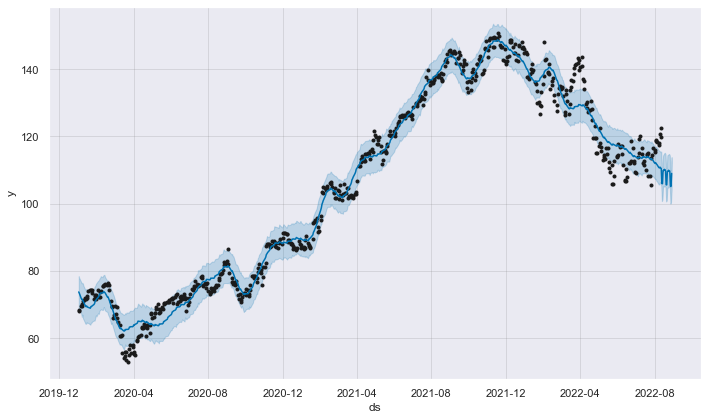

In [24]:
future_baseline = model_baseline.make_future_dataframe(periods=17)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline);

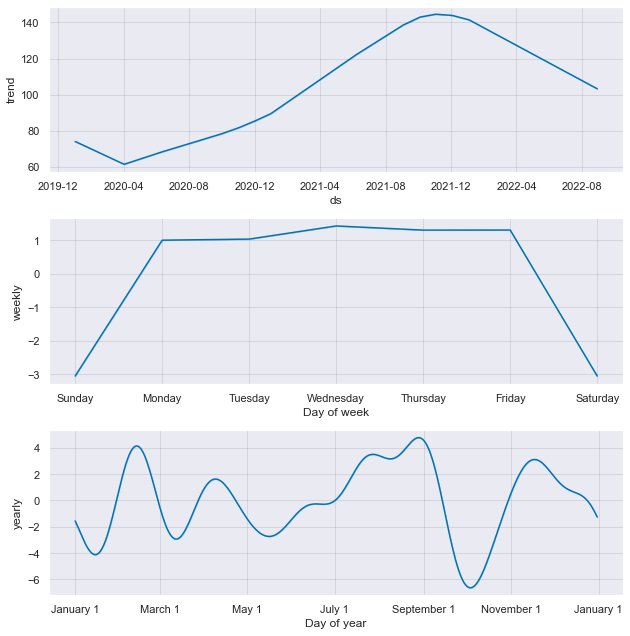

In [25]:
model_baseline.plot_components(forecast_baseline);

In [26]:
forecast_baseline.shape

(676, 19)

In [27]:
forecast_baseline.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,74.072569,68.777980,78.456089,74.072569,74.072569,-0.305999,-0.305999,-0.305999,1.308865,1.308865,1.308865,-1.614864,-1.614864,-1.614864,0.0,0.0,0.0,73.766570
1,2020-01-03,73.933716,68.391049,77.911461,73.933716,73.933716,-0.553556,-0.553556,-0.553556,1.310442,1.310442,1.310442,-1.863998,-1.863998,-1.863998,0.0,0.0,0.0,73.380159
2,2020-01-06,73.517155,67.390718,76.730107,73.517155,73.517155,-1.615116,-1.615116,-1.615116,1.007721,1.007721,1.007721,-2.622837,-2.622837,-2.622837,0.0,0.0,0.0,71.902039
3,2020-01-07,73.378302,66.349739,76.299572,73.378302,73.378302,-1.826906,-1.826906,-1.826906,1.040484,1.040484,1.040484,-2.867390,-2.867390,-2.867390,0.0,0.0,0.0,71.551396
4,2020-01-08,73.239448,67.026727,76.494492,73.239448,73.239448,-1.668215,-1.668215,-1.668215,1.432941,1.432941,1.432941,-3.101156,-3.101156,-3.101156,0.0,0.0,0.0,71.571234


In [28]:
performance_baseline = pd.merge(test, forecast_baseline[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [29]:
performance_baseline.shape

(11, 6)

In [30]:
performance_baseline

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,109.926409,105.223483,114.371090
1,2022-08-16,122.510002,216.240005,109.894175,105.207306,114.709795
2,2022-08-17,120.320000,214.300003,110.233393,105.064985,115.038094
3,2022-08-18,120.860001,214.860001,110.065783,105.268688,115.157956
4,2022-08-19,118.120003,211.789993,110.031058,104.970021,114.792803
5,2022-08-22,115.070000,207.259995,109.632757,104.750855,114.421045
6,2022-08-23,114.769997,206.869995,109.626675,104.765116,114.512263
7,2022-08-24,114.699997,207.740005,109.970605,105.179817,114.723255
8,2022-08-25,117.699997,210.750000,109.784472,104.882079,114.801898
9,2022-08-26,111.300003,203.770004,109.706628,105.039227,114.371550


In [31]:
performance_baseline_MAE = mean_absolute_error(performance_baseline["y"], performance_baseline["yhat"])
performance_baseline_MAE

7.333910942116933

In [32]:
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline["y"], performance_baseline["yhat"])
performance_baseline_MAPE

0.061527476924947574

In [33]:
model_season = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True)

In [34]:
model_season.fit(train)

23:08:54 - cmdstanpy - INFO - Chain [1] start processing
23:08:54 - cmdstanpy - INFO - Chain [1] done processing


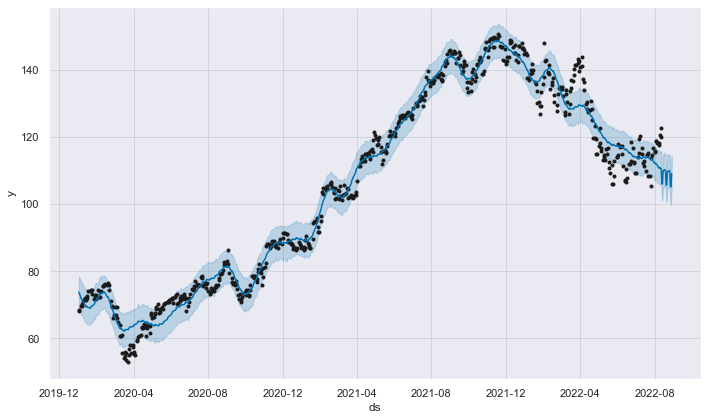

In [35]:
future_season = model_season.make_future_dataframe(periods=17)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season);

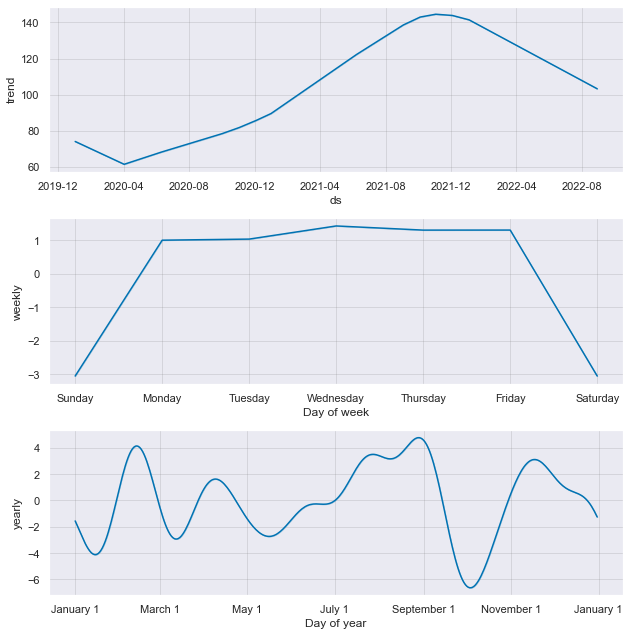

In [36]:
model_season.plot_components(forecast_season);

In [37]:
performance_season = pd.merge(test, forecast_season[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [38]:
performance_season.shape

(11, 6)

In [39]:
performance_baseline

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,109.926409,105.223483,114.371090
1,2022-08-16,122.510002,216.240005,109.894175,105.207306,114.709795
2,2022-08-17,120.320000,214.300003,110.233393,105.064985,115.038094
3,2022-08-18,120.860001,214.860001,110.065783,105.268688,115.157956
4,2022-08-19,118.120003,211.789993,110.031058,104.970021,114.792803
5,2022-08-22,115.070000,207.259995,109.632757,104.750855,114.421045
6,2022-08-23,114.769997,206.869995,109.626675,104.765116,114.512263
7,2022-08-24,114.699997,207.740005,109.970605,105.179817,114.723255
8,2022-08-25,117.699997,210.750000,109.784472,104.882079,114.801898
9,2022-08-26,111.300003,203.770004,109.706628,105.039227,114.371550


In [40]:
performance_season

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,109.926409,104.956276,114.880723
1,2022-08-16,122.510002,216.240005,109.894175,104.791076,114.642356
2,2022-08-17,120.320000,214.300003,110.233393,105.196662,115.377102
3,2022-08-18,120.860001,214.860001,110.065783,105.310589,114.757087
4,2022-08-19,118.120003,211.789993,110.031058,105.082167,114.784254
5,2022-08-22,115.070000,207.259995,109.632757,104.898592,114.813215
6,2022-08-23,114.769997,206.869995,109.626675,104.545213,114.496357
7,2022-08-24,114.699997,207.740005,109.970605,105.085140,114.585353
8,2022-08-25,117.699997,210.750000,109.784472,105.088159,114.762573
9,2022-08-26,111.300003,203.770004,109.706628,104.806045,114.464858


In [41]:
performance_season_mae = mean_absolute_error(performance_season["y"], performance_season["yhat"])
performance_season_mae

7.333910942116933

In [42]:
performance_season_mape = mean_absolute_percentage_error(performance_baseline["y"], performance_baseline["yhat"])
performance_season_mape

0.061527476924947574

In [145]:
model_multivariate = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True)

In [146]:
model_multivariate.add_regressor("VTI", standardize=False)
model_multivariate.fit(train)

04:18:32 - cmdstanpy - INFO - Chain [1] start processing
04:18:33 - cmdstanpy - INFO - Chain [1] done processing


In [147]:
future_multivariate = model_multivariate.make_future_dataframe(periods=17)
future_multivariate = pd.merge(future_multivariate, data[["ds", "VTI"]], on="ds", how="inner")
future_multivariate = future_multivariate.fillna(method="ffill")
future_multivariate.tail()

,ds,VTI
665,2022-08-23,206.869995
666,2022-08-24,207.740005
667,2022-08-25,210.750000
668,2022-08-26,203.770004
669,2022-08-29,202.279999


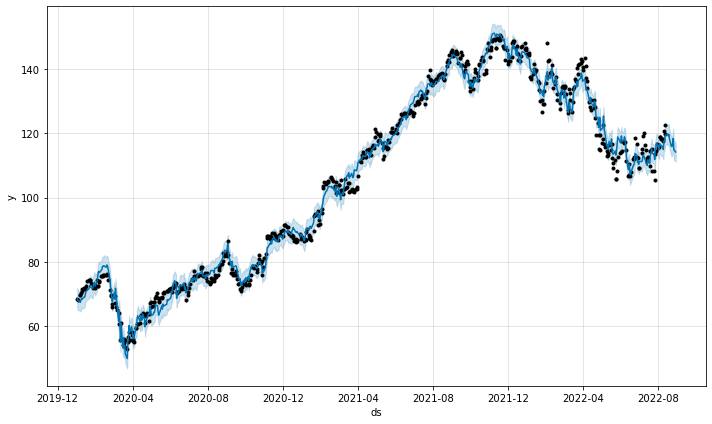

In [148]:
forecast_multivariate = model_multivariate.predict(future_multivariate)
model_multivariate.plot(forecast_multivariate);

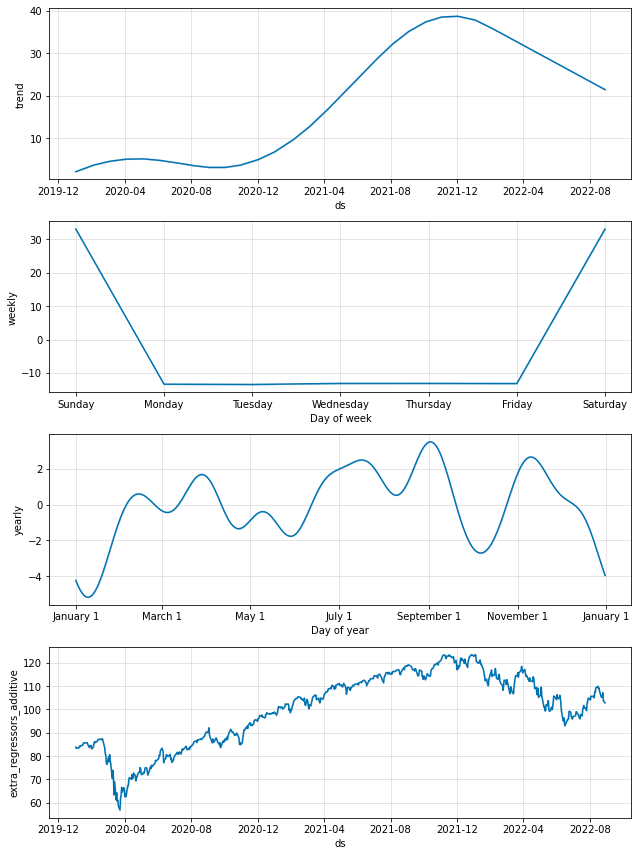

In [149]:
model_multivariate.plot_components(forecast_multivariate);

In [150]:
performance_multivariate = pd.merge(test, forecast_multivariate[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [151]:
performance_multivariate.shape

(11, 6)

In [152]:
performance_multivariate

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,119.651702,116.629670,122.590007
1,2022-08-16,122.510002,216.240005,119.864422,116.904845,123.002737
2,2022-08-17,120.320000,214.300003,119.270646,116.146294,122.577504
3,2022-08-18,120.860001,214.860001,119.658820,116.550811,122.865549
4,2022-08-19,118.120003,211.789993,118.169272,115.136457,121.036947
5,2022-08-22,115.070000,207.259995,116.048934,112.933021,118.904111
6,2022-08-23,114.769997,206.869995,115.895915,112.990176,119.063574
7,2022-08-24,114.699997,207.740005,116.774798,113.696591,119.700915
8,2022-08-25,117.699997,210.750000,118.429018,115.469260,121.489571
9,2022-08-26,111.300003,203.770004,114.947761,111.925885,117.896560


In [153]:
performance_multivariate_mae = mean_absolute_error(performance_multivariate["y"], performance_multivariate["yhat"])
performance_multivariate_mae

1.8731383596941746

In [154]:
performance_multivariate_mape = mean_absolute_percentage_error(performance_multivariate["y"], performance_multivariate["yhat"])
performance_multivariate_mape

0.016130149784554224

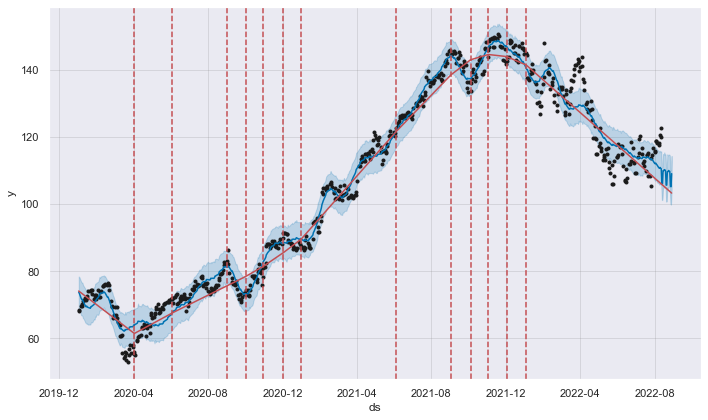

In [53]:
from prophet.plot import add_changepoints_to_plot
fig = model_season.plot(forecast_season)
a = add_changepoints_to_plot(fig.gca(), model_baseline, forecast_season)


In [28]:
# COVID time window
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,    
})
# Super Bowl time window
superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02', '2021-02-07']),
    'lower_window': -7,
    'upper_window': 1,    
})
# Combine all events
events = pd.concat((COVID, superbowl))
# Take a look at the events data
events

,holiday,ds,lower_window,upper_window
0,COVID,2020-03-15,-15,15
0,superbowl,2020-02-02,-7,1
1,superbowl,2021-02-07,-7,1


In [55]:
# Add holidays
model_holiday = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)
# Add built-in country-specific holidays
model_holiday.add_country_holidays(country_name='US')
# Add regressor
model_holiday.add_regressor('VTI', standardize=False)
# Fit the model on the training dataset
model_holiday.fit(train)
# All the holidays and events
model_holiday.train_holiday_names

23:08:58 - cmdstanpy - INFO - Chain [1] start processing
23:08:59 - cmdstanpy - INFO - Chain [1] done processing


0                                               COVID
1                                           superbowl
2                                      New Year's Day
3                          Martin Luther King Jr. Day
4                               Washington's Birthday
5                                        Memorial Day
6                                    Independence Day
7                         Independence Day (Observed)
8                                           Labor Day
9                                        Columbus Day
10                                       Veterans Day
11                                       Thanksgiving
12                                      Christmas Day
13                          New Year's Day (Observed)
14               Juneteenth National Independence Day
15    Juneteenth National Independence Day (Observed)
16                           Christmas Day (Observed)
dtype: object

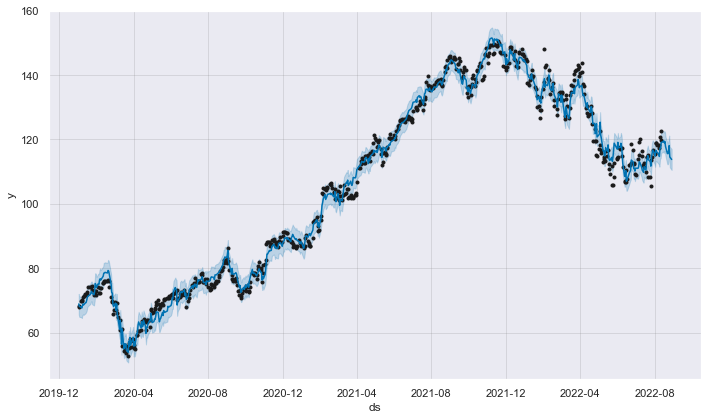

In [56]:
# Create the time range for the forecast
future_holiday = model_holiday.make_future_dataframe(periods=17)
# Append the regressor values
future_holiday = pd.merge(future_holiday, data[['ds', 'VTI']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday = model_holiday.predict(future_holiday)
# Visualize the forecast
model_holiday.plot(forecast_holiday); # Add semi-colon to remove the duplicated chart

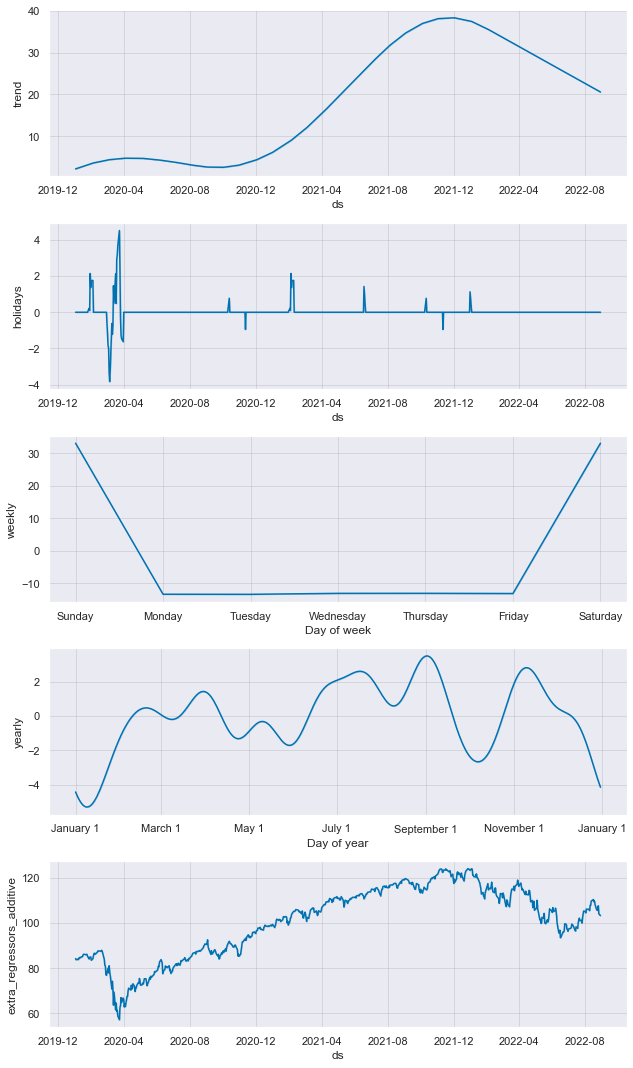

In [57]:
model_holiday.plot_components(forecast_holiday);

In [58]:
# Merge actual and predicted values
performance_holiday = pd.merge(test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-17:], on='ds')
# Check MAE value
performance_holiday_MAE = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAE for the holiday/event model is {performance_holiday_MAE}')
# Check MAPE value
performance_holiday_MAPE = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAPE for the holiday/event model is {performance_holiday_MAPE}')

The MAE for the holiday/event model is 1.8044394756562965
The MAPE for the holiday/event model is 0.015457785815145304


__mape decreased__ holiday ✔

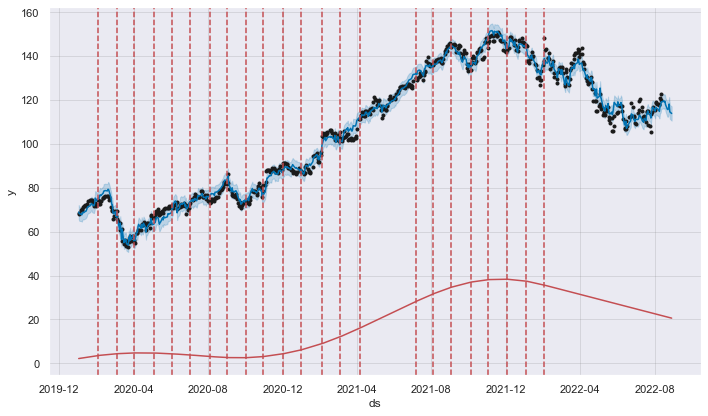

In [59]:
from prophet.plot import add_changepoints_to_plot
fig = model_holiday.plot(forecast_holiday)
a = add_changepoints_to_plot(fig.gca(), model_holiday, forecast_holiday)

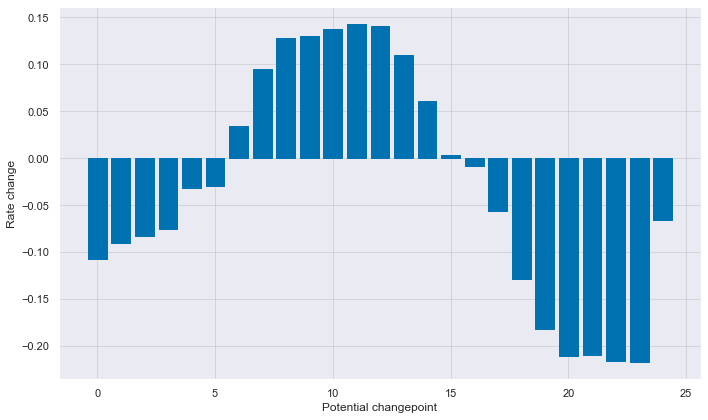

In [60]:
deltas = model_holiday.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

# TO-DO

## hyperparameter tuning
- changepoint_range
- growth
- changepoints

In [61]:
from prophet.diagnostics import cross_validation, performance_metrics

In [74]:
model_holiday_cv = cross_validation(model=model_holiday,
                                   initial="366 days",
                                   period="61 days", 
                                   horizon="122 days",
                                   parallel="processes")
model_holiday_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-10,102.327006,100.930409,103.755961,104.768997,2021-02-09
1,2021-02-11,102.981971,101.630956,104.397715,104.794502,2021-02-09
2,2021-02-12,103.842043,102.478409,105.215735,105.205498,2021-02-09
3,2021-02-16,104.728632,103.373435,106.157189,106.095001,2021-02-09
4,2021-02-17,104.876205,103.502079,106.286501,106.415497,2021-02-09


In [75]:
model_holiday_cv.shape

(676, 6)

In [76]:
performance_model_holiday_cv = performance_metrics(model_holiday_cv, rolling_window=1)

In [77]:
performance_model_holiday_cv.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,122 days,117.644279,10.846395,9.076538,0.071714,0.070202,0.068546,0.140533


### hyperparameter changes

In [61]:
from prophet.diagnostics import cross_validation, performance_metrics

In [78]:
model_holiday_cv = cross_validation(model=model_baseline,
                                   initial="366 days",
                                   period="61 days", 
                                   horizon="122 days",
                                   parallel="processes")
model_holiday_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-10,101.521843,99.226039,103.490725,104.768997,2021-02-09
1,2021-02-11,101.714508,99.716823,103.658473,104.794502,2021-02-09
2,2021-02-12,101.837255,99.689701,103.802233,105.205498,2021-02-09
3,2021-02-16,102.505583,100.415975,104.468126,106.095001,2021-02-09
4,2021-02-17,102.766351,100.706916,104.895865,106.415497,2021-02-09


In [79]:
model_holiday_cv.shape

(676, 6)

In [80]:
performance_model_holiday_cv = performance_metrics(model_holiday_cv, rolling_window=1)

In [81]:
performance_model_holiday_cv.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,122 days,363.753782,19.07233,15.078385,0.120539,0.090849,0.111529,0.12574


In [87]:
performance_model_holiday_cv["mape"][0]

0.12053871370612762

In [82]:
# Initiate the model
manual_model = Prophet.Prophet(changepoint_range=0.9)
# Fit the model on the training dataset
manual_model.fit(data)
# Cross validation
manual_model_cv = cross_validation(manual_model, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")
# Model performance metrics
manual_model_p = performance_metrics(manual_model_cv, rolling_window=1)
manual_model_p['mape'].values[0]

01:18:09 - cmdstanpy - INFO - Chain [1] start processing
01:18:09 - cmdstanpy - INFO - Chain [1] done processing


0.08285103648278126

__mape decreased__ changepoint ✔

In [100]:
# Add holidays
model_holiday_prior = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events, holidays_prior_scale=0.05)
# Add built-in country-specific holidays
model_holiday_prior.add_country_holidays(country_name='US')
# Add regressor
model_holiday_prior.add_regressor('VTI', standardize=False)
# Fit the model on the training dataset
model_holiday_prior.fit(train)

# Create the time range for the forecast
future_holiday_prior = model_holiday_prior.make_future_dataframe(periods=17)
# Append the regressor values
future_holiday_prior = pd.merge(future_holiday_prior, data[['ds', 'VTI']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday_prior = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday_prior = model_holiday_prior.predict(future_holiday)

# Merge actual and predicted values
performance_holiday_prior = pd.merge(test, forecast_holiday_prior[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-17:], on='ds')
# Check MAE value
performance_holiday_prior_MAE = mean_absolute_error(performance_holiday_prior['y'], performance_holiday_prior['yhat'])
print(f'The MAE for the holiday/event/prior model is {performance_holiday_prior_MAE}')
# Check MAPE value
performance_holiday_prior_MAPE = mean_absolute_percentage_error(performance_holiday_prior['y'], performance_holiday_prior['yhat'])
print(f'The MAPE for the holiday/event/prior model is {performance_holiday_prior_MAPE}')

01:54:00 - cmdstanpy - INFO - Chain [1] start processing
01:54:01 - cmdstanpy - INFO - Chain [1] done processing


The MAE for the holiday/event/prior model is 1.7678562345195068
The MAPE for the holiday/event/prior model is 0.01520870176606634


__mape decreased__ holidays_prior_scale ✔

In [114]:
type(events)

pandas.core.frame.DataFrame

In [ ]:
import itertools
# Set up parameter grid
param_grid = {
    'holidays_prior_scale': [0.05, 0.5, 1],
    'changepoint_prior_scale': [0.05, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 10],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet.Prophet(**params, holidays=events).fit(data)  
    # Cross-validation
    df_cv = cross_validation(m, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mape'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
print(best_params)

02:43:59 - cmdstanpy - INFO - Chain [1] start processing
02:43:59 - cmdstanpy - INFO - Chain [1] done processing
02:44:10 - cmdstanpy - INFO - Chain [1] start processing
02:44:11 - cmdstanpy - INFO - Chain [1] done processing
02:44:21 - cmdstanpy - INFO - Chain [1] start processing
02:44:21 - cmdstanpy - INFO - Chain [1] done processing
02:44:32 - cmdstanpy - INFO - Chain [1] start processing
02:44:33 - cmdstanpy - INFO - Chain [1] done processing
02:44:45 - cmdstanpy - INFO - Chain [1] start processing
02:44:45 - cmdstanpy - INFO - Chain [1] done processing
02:44:56 - cmdstanpy - INFO - Chain [1] start processing
02:44:57 - cmdstanpy - INFO - Chain [1] done processing
02:45:11 - cmdstanpy - INFO - Chain [1] start processing
02:45:11 - cmdstanpy - INFO - Chain [1] done processing
02:45:22 - cmdstanpy - INFO - Chain [1] start processing
02:45:22 - cmdstanpy - INFO - Chain [1] done processing
02:45:33 - cmdstanpy - INFO - Chain [1] start processing
02:45:33 - cmdstanpy - INFO - Chain [1]

{'holidays_prior_scale': 0.05, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}


In [ ]:
tuning_results.iloc[np.argmin(tuning_results["mape"]),:]

holidays_prior_scale           0.05
changepoint_prior_scale         0.5
seasonality_prior_scale        0.01
seasonality_mode           additive
mape                       0.074038
Name: 12, dtype: object

## TO-DO: Hyperparameter with log data

In [21]:
data_log = data.copy()

In [22]:
data_log["y_log"] = np.log(data["y"])

In [23]:
data_log["VTI_log"] = np.log(data["VTI"])

In [24]:
data_log

,ds,y,VTI,y_log,VTI_log
0,2020-01-02,68.368500,164.979996,4.224912,5.105824
1,2020-01-03,68.032997,163.929993,4.219993,5.099439
2,2020-01-06,69.710503,164.490005,4.244351,5.102850
3,2020-01-07,69.667000,164.100006,4.243727,5.100476
4,2020-01-08,70.216003,164.910004,4.251576,5.105400
...,...,...,...,...,...
667,2022-08-25,117.699997,210.750000,4.768139,5.350673
668,2022-08-26,111.300003,203.770004,4.712229,5.316992
669,2022-08-29,110.339996,202.279999,4.703566,5.309653
670,2022-08-30,109.910004,200.029999,4.699662,5.298467


In [25]:
data_log.drop(["y", "VTI"], axis=1, inplace=True)

In [31]:
data_log.rename(columns={"y_log": "y"}, inplace=True)

In [32]:
data_log

,ds,y,VTI_log
0,2020-01-02,4.224912,5.105824
1,2020-01-03,4.219993,5.099439
2,2020-01-06,4.244351,5.102850
3,2020-01-07,4.243727,5.100476
4,2020-01-08,4.251576,5.105400
...,...,...,...
667,2022-08-25,4.768139,5.350673
668,2022-08-26,4.712229,5.316992
669,2022-08-29,4.703566,5.309653
670,2022-08-30,4.699662,5.298467


In [39]:
from prophet.diagnostics import cross_validation, performance_metrics

In [126]:
import itertools
# Set up parameter grid
param_grid = {
    'holidays_prior_scale': [0.05, 1, 5],
    'changepoint_prior_scale': [0.005, 0.05, 0.5],
    'seasonality_prior_scale': [0.1, 1, 10],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet.Prophet(**params, holidays=events)
    m.add_country_holidays(country_name="US")
    m.add_regressor("VTI_log", standardize=False)
    m.fit(train_log)
    # Cross-validation
    df_cv = cross_validation(m, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mape'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
print(best_params)

03:58:15 - cmdstanpy - INFO - Chain [1] start processing
03:58:15 - cmdstanpy - INFO - Chain [1] done processing
03:58:24 - cmdstanpy - INFO - Chain [1] start processing
03:58:24 - cmdstanpy - INFO - Chain [1] done processing
03:58:33 - cmdstanpy - INFO - Chain [1] start processing
03:58:34 - cmdstanpy - INFO - Chain [1] done processing
03:58:44 - cmdstanpy - INFO - Chain [1] start processing
03:58:45 - cmdstanpy - INFO - Chain [1] done processing
03:58:55 - cmdstanpy - INFO - Chain [1] start processing
03:58:55 - cmdstanpy - INFO - Chain [1] done processing
03:59:04 - cmdstanpy - INFO - Chain [1] start processing
03:59:05 - cmdstanpy - INFO - Chain [1] done processing
03:59:14 - cmdstanpy - INFO - Chain [1] start processing
03:59:15 - cmdstanpy - INFO - Chain [1] done processing
03:59:26 - cmdstanpy - INFO - Chain [1] start processing
03:59:27 - cmdstanpy - INFO - Chain [1] done processing
03:59:37 - cmdstanpy - INFO - Chain [1] start processing
03:59:38 - cmdstanpy - INFO - Chain [1]

{'holidays_prior_scale': 1, 'changepoint_prior_scale': 0.005, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}


custom config

In [36]:
tuning_results.iloc[np.argmin(tuning_results["mape"]),:]

holidays_prior_scale            1.0
changepoint_prior_scale        0.05
seasonality_prior_scale         1.0
seasonality_mode           additive
mape                       0.016609
Name: 26, dtype: object

add_regressor, country holiday, full log data config

In [42]:
tuning_results.iloc[np.argmin(tuning_results["mape"]),:]

holidays_prior_scale            5.0
changepoint_prior_scale       0.005
seasonality_prior_scale         1.0
seasonality_mode           additive
mape                       0.012704
Name: 38, dtype: object

same as above but train test log data

In [127]:
tuning_results.iloc[np.argmin(tuning_results["mape"]),:]

holidays_prior_scale            1.0
changepoint_prior_scale       0.005
seasonality_prior_scale         0.1
seasonality_mode           additive
mape                       0.016049
Name: 18, dtype: object

__best mape__ log transform ✔

In [37]:
tuning_results

,holidays_prior_scale,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
0,0.05,0.005,0.1,additive,0.030118
1,0.05,0.005,0.1,multiplicative,0.033595
2,0.05,0.005,1.0,additive,0.029696
3,0.05,0.005,1.0,multiplicative,0.030576
4,0.05,0.005,10.0,additive,0.030825
5,0.05,0.005,10.0,multiplicative,0.030188
6,0.05,0.050,0.1,additive,0.017467
7,0.05,0.050,0.1,multiplicative,0.018975
8,0.05,0.050,1.0,additive,0.017501
9,0.05,0.050,1.0,multiplicative,0.032473


In [43]:
tuning_results

,holidays_prior_scale,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
0,0.05,0.005,0.1,additive,0.013269
1,0.05,0.005,0.1,multiplicative,0.015022
2,0.05,0.005,1.0,additive,0.013193
3,0.05,0.005,1.0,multiplicative,0.014219
4,0.05,0.005,10.0,additive,0.013539
5,0.05,0.005,10.0,multiplicative,0.014170
6,0.05,0.050,0.1,additive,0.015582
7,0.05,0.050,0.1,multiplicative,0.022445
8,0.05,0.050,1.0,additive,0.017009
9,0.05,0.050,1.0,multiplicative,0.023792


## Clean model

In [80]:
start_date = "2020-01-02"

end_date = "2022-09-01"

train_end_date = "2022-08-14"

In [81]:
train = data[data["ds"] <= train_end_date]
test = data[data["ds"] > train_end_date]

In [90]:
train_log = train.copy()
test_log = test.copy()

In [91]:
train_log["y_log"] = np.log(train_log["y"])
test_log["y_log"] = np.log(test_log["y"])

In [93]:
train_log["VTI_log"] = np.log(train_log["VTI"])
test_log["VTI_log"] = np.log(test_log["VTI"])

In [95]:
train_log.drop(["y", "VTI"], axis=1, inplace=True)
test_log.drop(["y", "VTI"], axis=1, inplace=True)

In [96]:
train_log.rename(columns={"y_log": "y"}, inplace=True)
test_log.rename(columns={"y_log": "y"}, inplace=True)

In [133]:
model_final = Prophet.Prophet(holidays_prior_scale= 1, changepoint_prior_scale=0.005, seasonality_prior_scale=0.1, seasonality_mode="additive", holidays=events)

In [134]:
model_final.add_country_holidays(country_name="US")
model_final.add_regressor("VTI_log", standardize=False)
model_final.fit(train_log)

04:16:02 - cmdstanpy - INFO - Chain [1] start processing
04:16:02 - cmdstanpy - INFO - Chain [1] done processing


In [135]:
model_final_cv = cross_validation(model_final, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")

In [136]:
model_final_performance = performance_metrics(model_final_cv, rolling_window=1)

In [137]:
model_final_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,122 days,0.00885,0.094072,0.077658,0.016049,0.01388,0.015939,0.152367


In [138]:
future_model_final = model_final.make_future_dataframe(periods=17)

In [139]:
future_model_final = pd.merge(future_model_final, data_log[["ds", "VTI_log"]], on="ds", how="inner")

In [140]:
future_model_final.tail()

,ds,VTI_log
665,2022-08-23,5.332091
666,2022-08-24,5.336287
667,2022-08-25,5.350673
668,2022-08-26,5.316992
669,2022-08-29,5.309653


In [141]:
forecast_model_final = model_final.predict(future_model_final)

In [142]:
forecast_model_final.describe().T

,count,mean,std,min,25%,50%,75%,max
trend,670.0,0.185784,0.129124,0.024905,0.031560,0.211859,0.310408,0.357147
yhat_lower,670.0,4.593577,0.282755,3.936538,4.316675,4.685354,4.861549,5.002513
yhat_upper,670.0,4.652026,0.282860,3.995126,4.375472,4.743367,4.920700,5.060395
trend_lower,670.0,0.185782,0.129123,0.024905,0.031560,0.211859,0.310408,0.357147
trend_upper,670.0,0.185785,0.129125,0.024905,0.031560,0.211859,0.310408,0.357147
...,...,...,...,...,...,...,...,...
yearly_upper,670.0,0.000715,0.021418,-0.057618,-0.006465,0.003780,0.013652,0.034373
multiplicative_terms,670.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
multiplicative_terms_lower,670.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
multiplicative_terms_upper,670.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


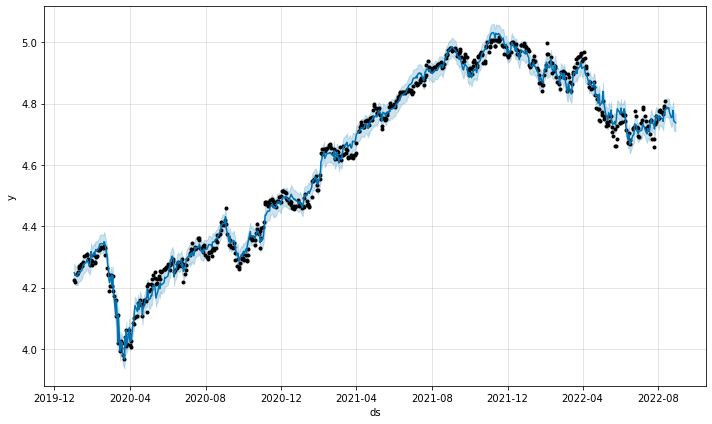

In [143]:
model_final.plot(forecast_model_final);

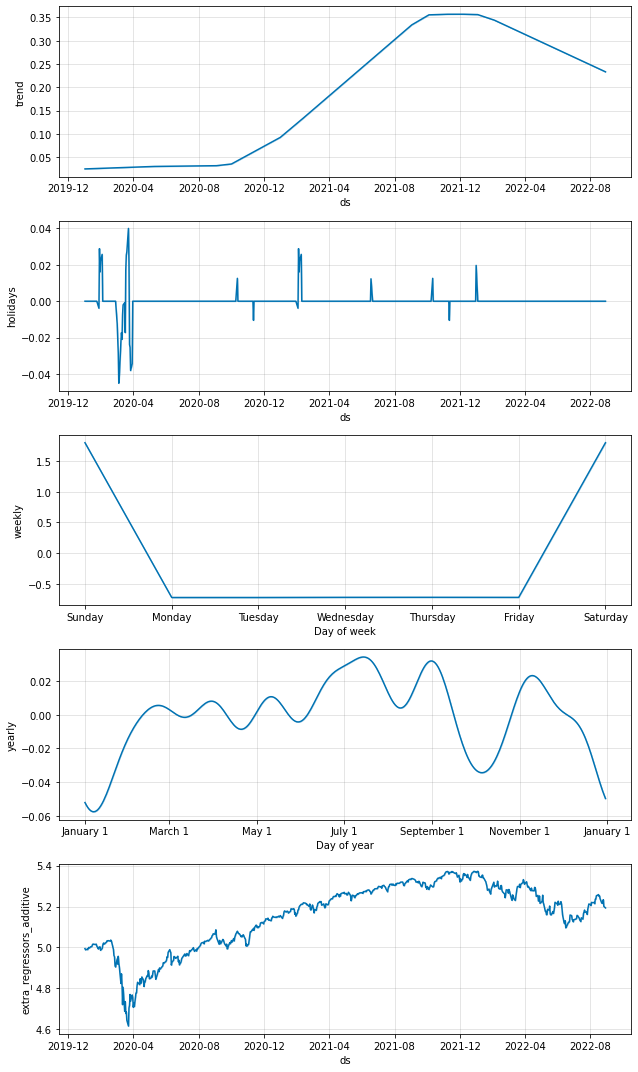

In [144]:
model_final.plot_components(forecast_model_final);

In [155]:
performance_model_final = pd.merge(test_log, forecast_model_final[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [156]:
performance_model_final.shape

(11, 6)

In [157]:
performance_model_final

,ds,y,VTI_log,yhat,yhat_lower,yhat_upper
0,2022-08-15,4.811208,5.374259,4.784762,4.756137,4.816835
1,2022-08-16,4.808193,5.376389,4.787838,4.758271,4.817746
2,2022-08-17,4.790155,5.367377,4.782580,4.752197,4.813515
3,2022-08-18,4.794633,5.369987,4.786786,4.758693,4.815945
4,2022-08-19,4.771701,5.355595,4.773025,4.745658,4.803524
5,2022-08-22,4.745541,5.333974,4.754452,4.724339,4.784427
6,2022-08-23,4.742930,5.332091,4.754135,4.725316,4.784469
7,2022-08-24,4.742320,5.336287,4.762049,4.733336,4.791766
8,2022-08-25,4.768139,5.350673,4.777740,4.748721,4.806092
9,2022-08-26,4.712229,5.316992,4.744793,4.712762,4.773273


In [158]:
performance_model_final_mae = mean_absolute_error(performance_model_final["y"], performance_model_final["yhat"])
performance_model_final_mae

0.016323266974162642

In [159]:
performance_model_final_mape = mean_absolute_percentage_error(performance_model_final["y"], performance_model_final["yhat"])
performance_model_final_mape

0.0034344058774417024

## TO-DO: Manual time series forecast

In [1]:
import yfinance as yf
import prophet as Prophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


C:\Users\Furka\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Furka\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Furka\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\Furka\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
start_date = "2020-01-02"

end_date = "2022-09-01"

train_end_date = "2022-08-14"

In [3]:
ticker_list = ["GOOG"]

data = yf.download(ticker_list, start = start_date, end= end_date)[["Close"]]

data.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003


<AxesSubplot:xlabel='Date'>

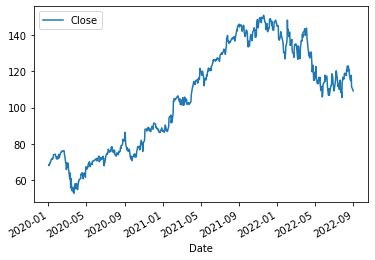

In [4]:
data.plot()

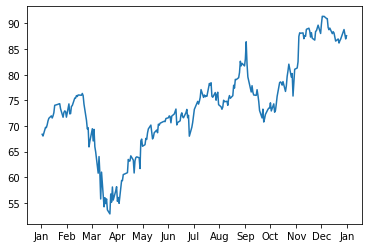

In [5]:
import matplotlib.dates as mdates
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
plt.plot(data.loc["2020"])
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

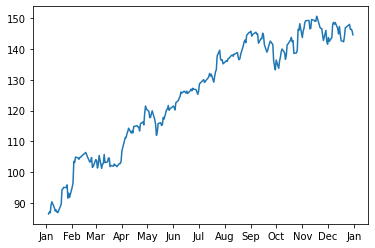

In [6]:
plt.plot(data.loc["2021"])
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

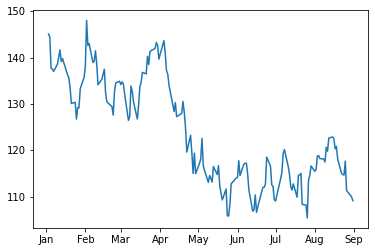

In [7]:
plt.plot(data.loc["2022"])
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

### We can see that there is no seasonality

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', length=672, freq=None)

In [11]:
decompose_data = seasonal_decompose(data, model="additive", period=True)
decompose_data2 = seasonal_decompose(data, model="additive", period=5)
decompose_data3 = seasonal_decompose(data, model="additive", period=20)

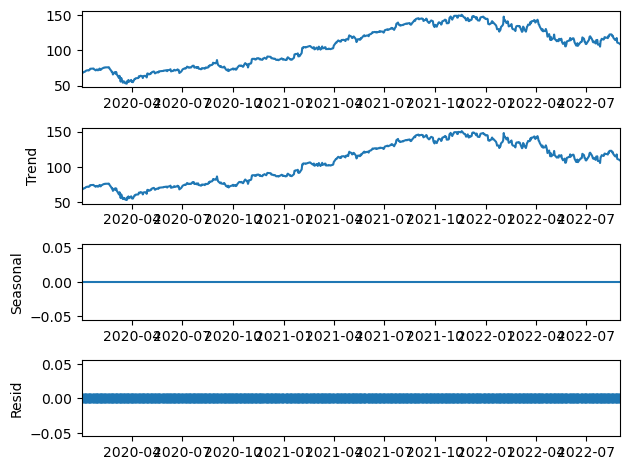

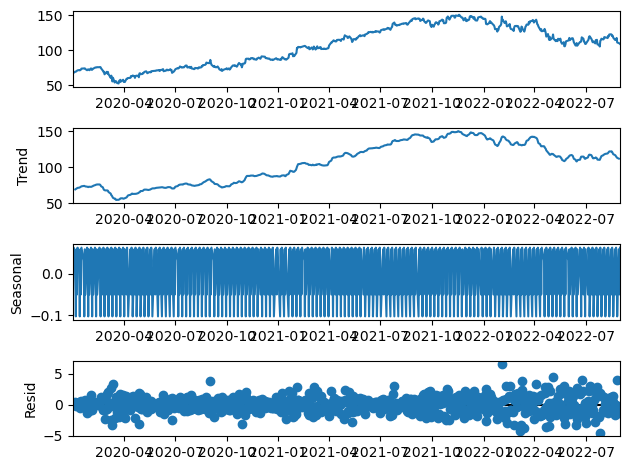

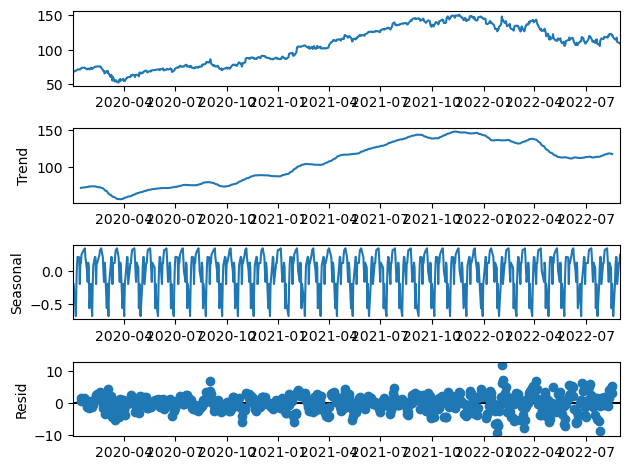

In [12]:
plt.style.use("default")
decompose_data.plot();
decompose_data2.plot();
decompose_data3.plot();

In [13]:
y = data["Close"].resample("M").sum()
y1 = data["Close"].resample("D").sum()
y2 = data["Close"].resample("Y").sum()

In [14]:
y

Date
2020-01-31    1508.486511
2020-02-29    1390.904999
2020-03-31    1307.233505
2020-04-30    1295.847488
2020-05-31    1381.113747
2020-06-30    1574.152496
2020-07-31    1664.930504
2020-08-31    1623.242012
2020-09-30    1594.481491
2020-10-31    1701.510994
2020-11-30    1748.348488
2020-12-31    1949.505981
2021-01-31    1717.964508
2021-02-28    1964.939003
2021-03-31    2368.821518
2021-04-30    2404.334503
2021-05-31    2352.595512
2021-06-30    2751.533508
2021-07-31    2779.124969
2021-08-31    3065.047516
2021-09-30    2979.520004
2021-10-31    2949.422485
2021-11-30    3096.083008
2021-12-31    3204.346512
2022-01-31    2720.854485
2022-02-28    2594.978508
2022-03-31    3113.196983
2022-04-30    2572.210472
2022-05-31    2384.093513
2022-06-30    2369.327507
2022-07-31    2266.532005
2022-08-31    2693.640007
Freq: M, Name: Close, dtype: float64

In [15]:
y1

Date
2020-01-02     68.368500
2020-01-03     68.032997
2020-01-04      0.000000
2020-01-05      0.000000
2020-01-06     69.710503
                 ...    
2022-08-27      0.000000
2022-08-28      0.000000
2022-08-29    110.339996
2022-08-30    109.910004
2022-08-31    109.150002
Freq: D, Name: Close, Length: 973, dtype: float64

In [16]:
decompose_data = seasonal_decompose(y, model="additive")

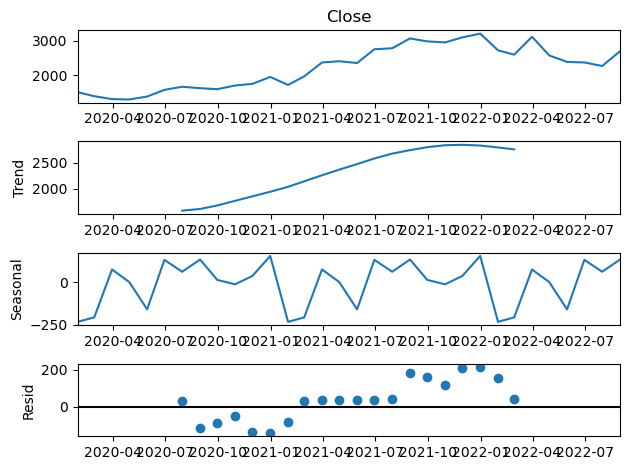

In [17]:
decompose_data.plot();

In [18]:
decompose_data = seasonal_decompose(y, model="multiplicative")

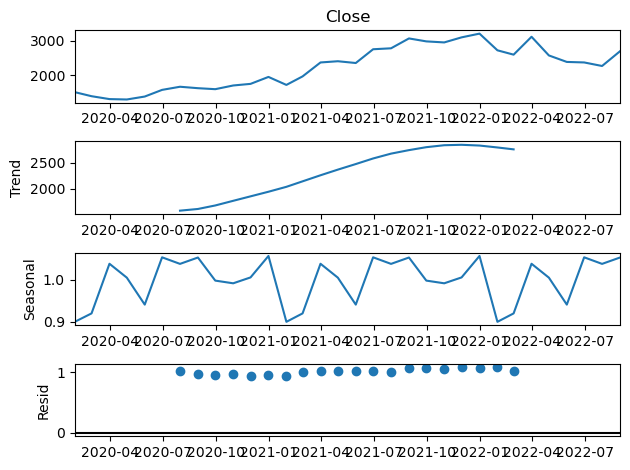

In [19]:
decompose_data.plot();

In [20]:
test = pd.bdate_range(start=start_date, end="2022-08-31")

In [21]:
test

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', length=695, freq='B')

In [22]:
data2 = data.asfreq(freq="B", method="bfill")

In [23]:
data

,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003
...,...
2022-08-25,117.699997
2022-08-26,111.300003
2022-08-29,110.339996


In [24]:
data2.head(20)

,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003
2020-01-09,70.991501
2020-01-10,71.486504
2020-01-13,71.961502
2020-01-14,71.543999


In [25]:
decompose_data4 = seasonal_decompose(data2, model="additive")

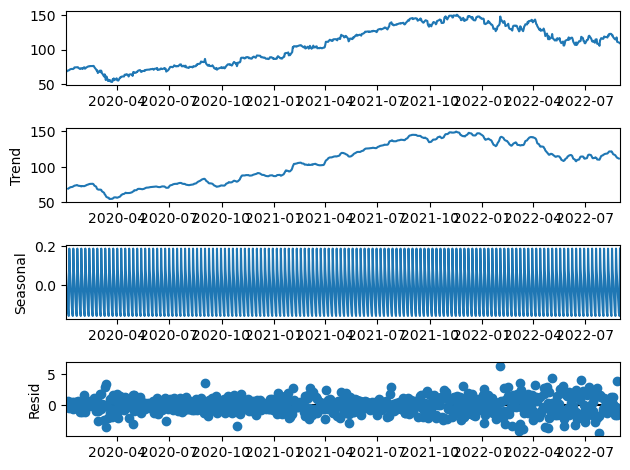

In [26]:
decompose_data4.plot();

<AxesSubplot:xlabel='Date'>

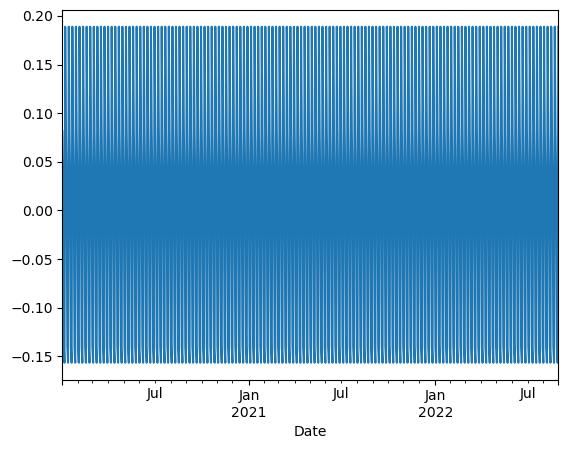

In [27]:
seasonal_decompose(data2, model="additive").seasonal.plot()

In [28]:
data2.isna().value_counts()

Close
False    695
dtype: int64

In [29]:
data.isna().value_counts()

Close
False    672
dtype: int64

In [30]:
data3 = data - data2

In [31]:
data3[data3.iloc[:,0] != 0.0]

,Close
Date,
2020-01-20,NaN
2020-02-17,NaN
2020-04-10,NaN
2020-05-25,NaN
2020-07-03,NaN
2020-09-07,NaN
2020-11-26,NaN
2020-12-25,NaN
2021-01-01,NaN


In [32]:
data.head(20)

,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003
2020-01-09,70.991501
2020-01-10,71.486504
2020-01-13,71.961502
2020-01-14,71.543999


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

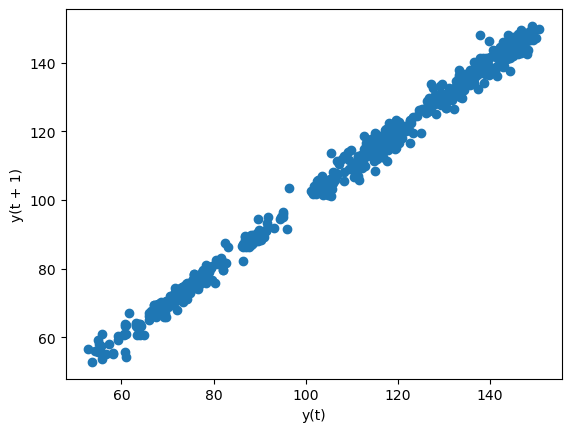

In [46]:
pd.plotting.lag_plot(data2, lag=1)


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

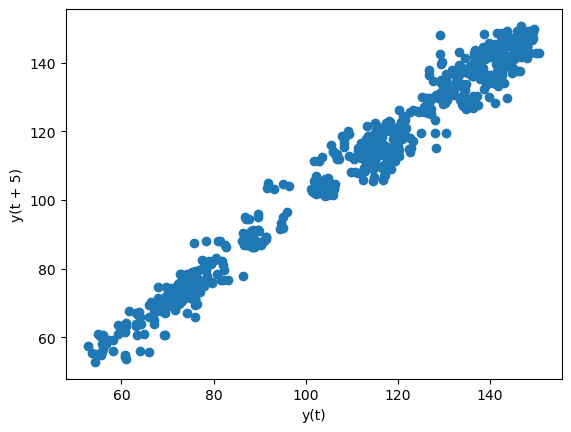

In [44]:
pd.plotting.lag_plot(data2, lag=5)

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

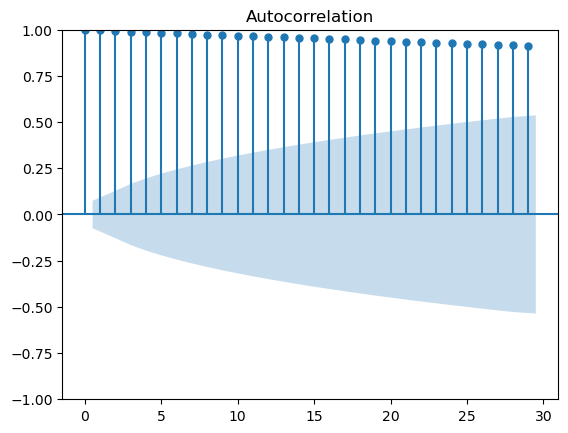

In [35]:
plot_acf(data2);

C:\Users\Furka\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


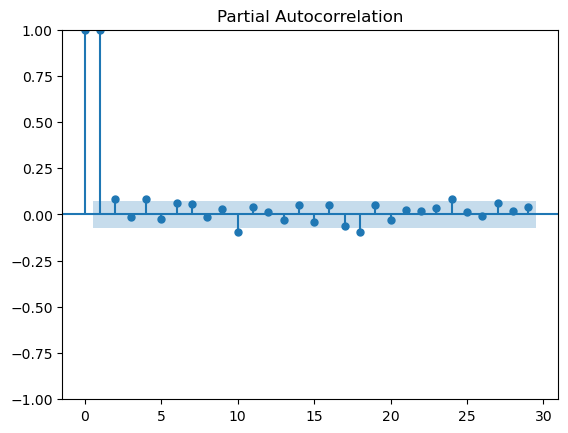

In [36]:
plot_pacf(data2);

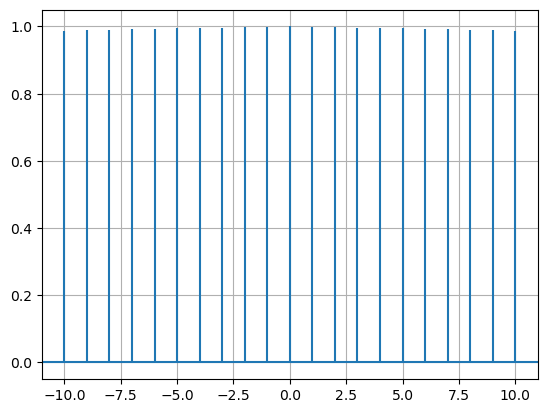

In [37]:
plt.acorr(data2["Close"], maxlags = 10)
plt.grid(True)
plt.show()

## TO-DO Linear regression, OLS summary, trend check

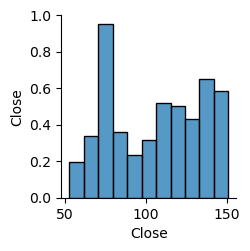

In [47]:
sns.pairplot(data2, kind="reg")

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

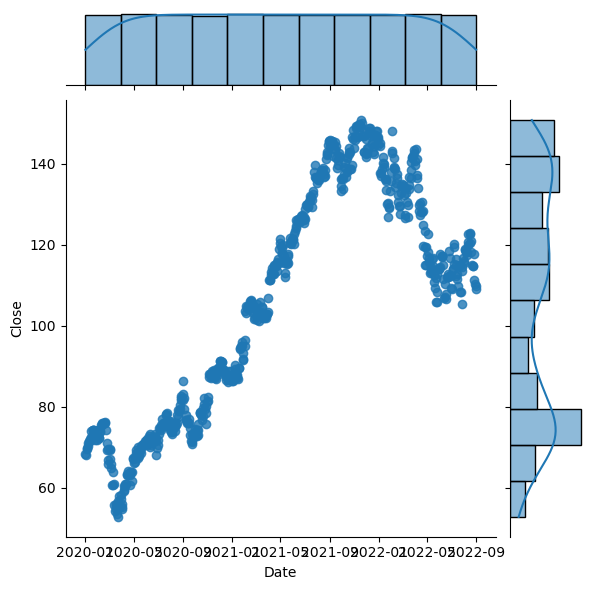

In [48]:
sns.jointplot(x= data2.index, y= data2["Close"], data= data2, kind="reg")

In [56]:
import statsmodels.api as sm

In [74]:
lm_data = data2.copy()

In [75]:
lm_data["Time"] = np.arange(len(data2.index))

In [76]:
lm_data.head()

,Close,Time
Date,,
2020-01-02,68.368500,0
2020-01-03,68.032997,1
2020-01-06,69.710503,2
2020-01-07,69.667000,3
2020-01-08,70.216003,4


In [77]:
X = lm_data.loc[:, ["Time"]]
y = lm_data.loc[:,"Close"]

In [78]:
lm = sm.OLS(y, X)

In [79]:
model = lm.fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              5553.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                        0.00
Time:                        11:46:27   Log-Likelihood:                         -3485.9
No. Observations:                 695   AIC:                                      6974.
Df Residuals:                     694   BIC:                                      6978.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Time           0.2575      0.003     74.520      0.000       0.251       0.264
==============================================================================
Omnibus:                       94.157   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.849
Skew:                          -1.043   Prob(JB):                     3.86e-29
Kurtosis:                       3.412   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.889    
Dependent Variable:     Close            AIC:                         6973.8801
Date:                   2022-10-07 11:46 BIC:                         6978.4240
No. Observations:       695              Log-Likelihood:              -3485.9  
Df Model:               1                F-statistic:                 5553.    
Df Residuals:           694              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.889            Scale:                       1332.8   
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
Time       0.2575         0.0035       74.5196       0.0000       0.2507       0.2642
-------------------------------------------------------------------------------
Omnibus:                   94.157           Durbin-Watson:              0.003  
Prob(Omnibus):             0.000            Jarque-Bera (JB):           130.849
Skew:                      -1.043           Prob(JB):                   0.000  
Kurtosis:                  3.412            Condition No.:              1      
===============================================================================

"""

In [83]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [84]:
y_pred

Date
2020-01-02      0.000000
2020-01-03      0.257458
2020-01-06      0.514917
2020-01-07      0.772375
2020-01-08      1.029834
                 ...    
2022-08-25    177.646363
2022-08-26    177.903822
2022-08-29    178.161280
2022-08-30    178.418739
2022-08-31    178.676197
Freq: B, Length: 695, dtype: float64

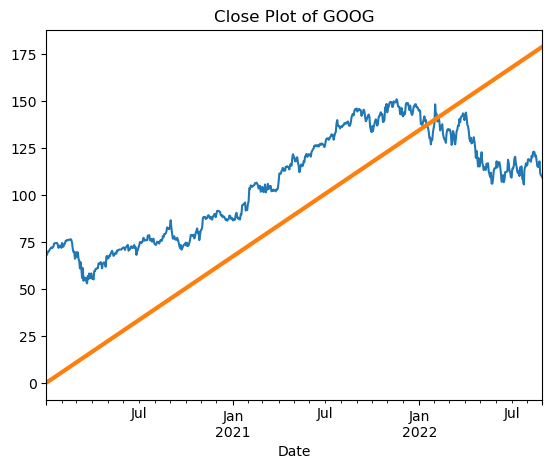

In [96]:
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Close Plot of GOOG');

In [87]:
model.resid

Date
2020-01-02    68.368500
2020-01-03    67.775539
2020-01-06    69.195586
2020-01-07    68.894624
2020-01-08    69.186169
                ...    
2022-08-25   -59.946366
2022-08-26   -66.603819
2022-08-29   -67.821284
2022-08-30   -68.508735
2022-08-31   -69.526196
Freq: B, Length: 695, dtype: float64

<AxesSubplot:>

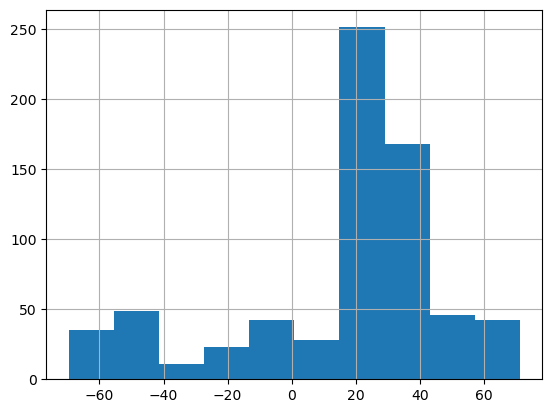

In [89]:
model.resid.hist()

<AxesSubplot:ylabel='Density'>

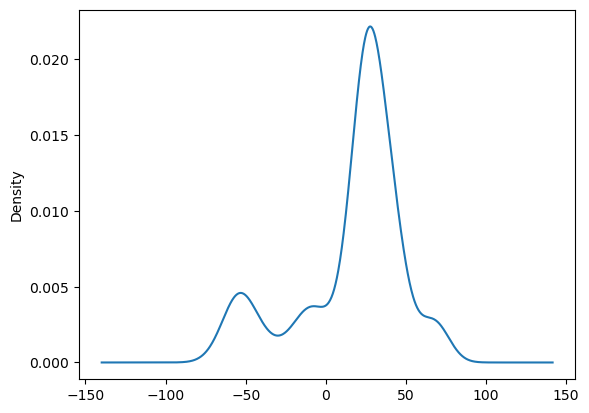

In [88]:
model.resid.plot(kind="kde")

C:\Users\Furka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:ylabel='Density'>

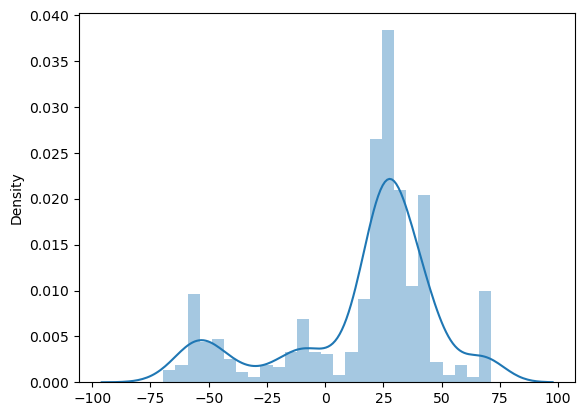

In [91]:
sns.distplot(model.resid, kde=True, hist=True)

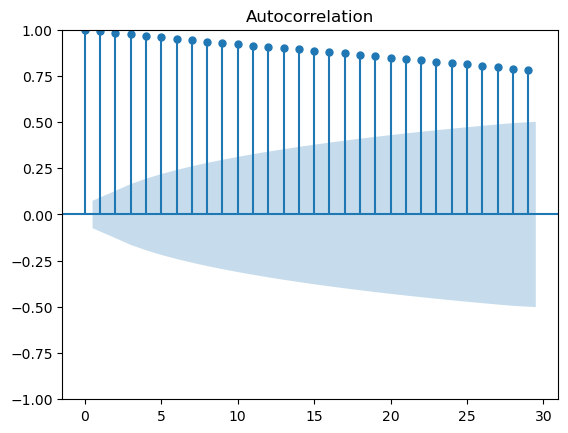

In [92]:
plot_acf(model.resid);

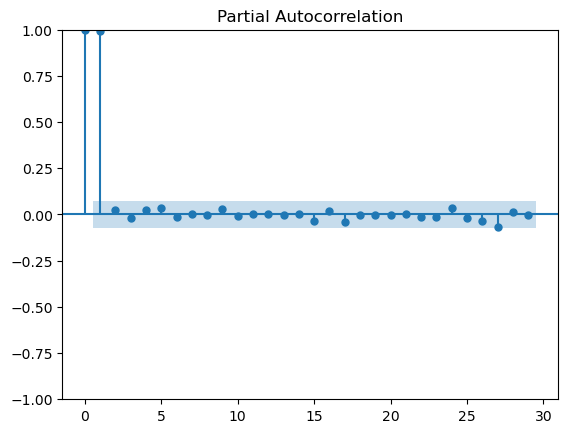

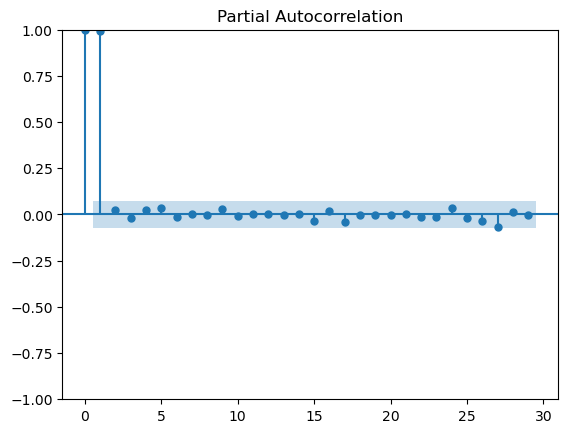

In [93]:
plot_pacf(model.resid)

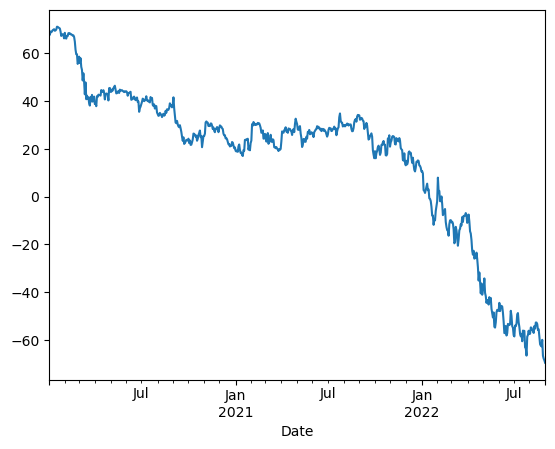

In [95]:
model.resid.plot();

In [69]:
from sklearn.linear_model import LinearRegression

X = lm_data.loc[:, ["Time"]]
y = lm_data.loc[:,"Close"]

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [71]:
model.intercept_

65.61207473298747

In [72]:
model.coef_

array([0.11574775])

In [57]:
x = data2.index.values.reshape(-1,1)
y = data2["Close"]

In [55]:
x

array([['2020-01-02T00:00:00.000000000'],
       ['2020-01-03T00:00:00.000000000'],
       ['2020-01-06T00:00:00.000000000'],
       ['2020-01-07T00:00:00.000000000'],
       ['2020-01-08T00:00:00.000000000'],
       ['2020-01-09T00:00:00.000000000'],
       ['2020-01-10T00:00:00.000000000'],
       ['2020-01-13T00:00:00.000000000'],
       ['2020-01-14T00:00:00.000000000'],
       ['2020-01-15T00:00:00.000000000'],
       ['2020-01-16T00:00:00.000000000'],
       ['2020-01-17T00:00:00.000000000'],
       ['2020-01-20T00:00:00.000000000'],
       ['2020-01-21T00:00:00.000000000'],
       ['2020-01-22T00:00:00.000000000'],
       ['2020-01-23T00:00:00.000000000'],
       ['2020-01-24T00:00:00.000000000'],
       ['2020-01-27T00:00:00.000000000'],
       ['2020-01-28T00:00:00.000000000'],
       ['2020-01-29T00:00:00.000000000'],
       ['2020-01-30T00:00:00.000000000'],
       ['2020-01-31T00:00:00.000000000'],
       ['2020-02-03T00:00:00.000000000'],
       ['2020-02-04T00:00:00.00000

In [58]:
lm = sm.OLS(y, X)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).